<a href="https://colab.research.google.com/github/kangseunb7/MDST-Tutorial/blob/main/checkpoint1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Checkpoint 1

Reminder:

- You are being evaluated for completion and effort in this checkpoint.
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.
- Please do not remove any comment that starts with: "# @@@".

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.


<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Load in the "states_edu.csv" dataset and take a look at the head of the data

In [ ]:
raw_data = pd.read_csv('states_edu.csv')

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [ ]:
data = raw_data.dropna()

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: *ENTER YOUR CHOICE HERE*

How many years of data are logged in our dataset?

In [ ]:
# @@@ 1
# Your Code
raw_data["YEAR"].nunique()

33

Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [ ]:
# @@@ 2
state_score = data.groupby("STATE")
state_score

state_score["AVG_MATH_8_SCORE"].mean()

# Ohio beat Michigan for this test.

,AVG_MATH_8_SCORE
STATE,
ALABAMA,266.285714
ALASKA,281.285714
ARIZONA,277.142857
ARKANSAS,274.285714
CALIFORNIA,270.833333
COLORADO,286.428571
CONNECTICUT,284.571429
DELAWARE,281.428571
DISTRICT_OF_COLUMBIA,254.000000


Find the average for your chosen test across all states in 2019

In [55]:
# @@@ 3
result = data.groupby(["YEAR", "STATE"])["AVG_MATH_8_SCORE"].mean()

For each state, find a maximum value for your chosen test score

In [ ]:
# @@@ 4
data.groupby(["STATE"])["AVG_MATH_8_SCORE"].max()


,AVG_MATH_8_SCORE
STATE,
ALABAMA,269.0
ALASKA,283.0
ARIZONA,283.0
ARKANSAS,279.0
CALIFORNIA,276.0
COLORADO,292.0
CONNECTICUT,289.0
DELAWARE,284.0
DISTRICT_OF_COLUMBIA,265.0


*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable.

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [58]:
# @@@ 5
data['EXPENDITURE_PERCENTAGE_FROM_STATE'] = data['STATE_REVENUE'] / data['TOTAL_REVENUE']
data.head()


<ipython-input-58-70060876c163>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['EXPENDITURE_PERCENTAGE_FROM_STATE'] = data['STATE_REVENUE'] / data['TOTAL_REVENUE']


,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,EXPENDITURE_PERCENTAGE_FROM_STATE
561,2003_ALABAMA,ALABAMA,2003,727900.0,5196054.0,567704.0,2966981.0,1661369.0,5298932.0,2817111.0,...,59663.0,42005.0,466920.0,205907.0,731220.0,223.0,262.0,207.0,253.0,0.571007
562,2003_ALASKA,ALASKA,2003,133303.0,1425948.0,259423.0,813371.0,353154.0,1610289.0,763525.0,...,11140.0,8651.0,82337.0,40238.0,133933.0,233.0,279.0,212.0,256.0,0.570407
563,2003_ARIZONA,ARIZONA,2003,875111.0,6529894.0,740579.0,2912629.0,2876686.0,6210287.0,2810907.0,...,76376.0,68815.0,613442.0,307272.0,1012068.0,229.0,271.0,209.0,255.0,0.446045
564,2003_ARKANSAS,ARKANSAS,2003,450158.0,3241275.0,379947.0,2394336.0,466992.0,3242799.0,1768713.0,...,37004.0,28840.0,281834.0,132712.0,454523.0,229.0,266.0,214.0,258.0,0.738702
565,2003_CALIFORNIA,CALIFORNIA,2003,6226552.0,59815855.0,5795655.0,33617766.0,20402434.0,59749885.0,29561563.0,...,500143.0,395194.0,3929869.0,1854518.0,6413867.0,227.0,267.0,206.0,251.0,0.562021


Feature engineering justification: **<BRIEFLY I thought maybe some states contribute more towards their teens education.\>**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, 'Grades across All Grade Levels')

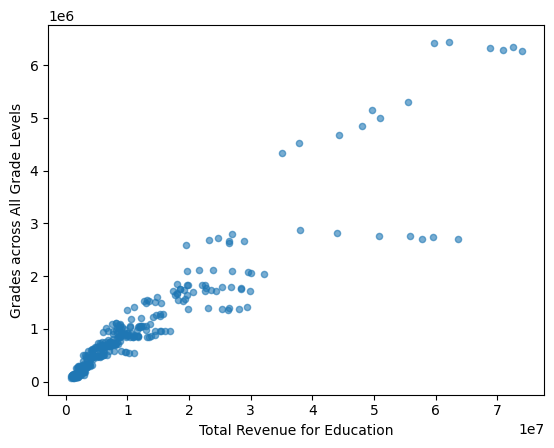

In [59]:
# @@@ 6
data.plot.scatter(x='TOTAL_REVENUE', y='GRADES_ALL_G', alpha=0.6)
plt.xlabel('Total Revenue for Education')
plt.ylabel('Grades across All Grade Levels')

# As the total revenue for education increases, so do the grades across all grade levels.

**<CAPTION FOR VIZ 1>**

**Visualization 2**

Text(0.5, 1.0, '4th Grade Math Score Over Time')

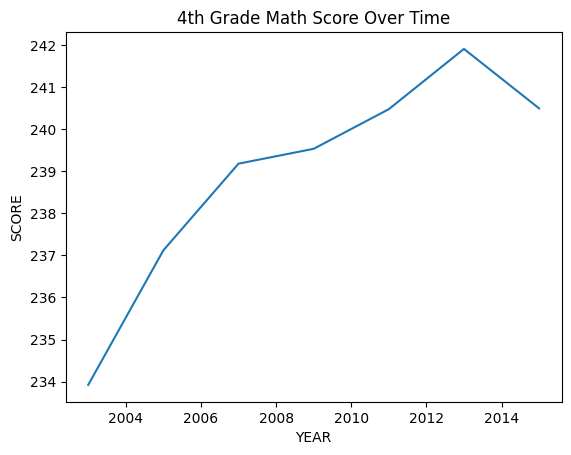

In [60]:
# @@@ 7
data.groupby('YEAR')["AVG_MATH_4_SCORE"].mean().plot()
plt.ylabel('SCORE')
plt.title('4th Grade Math Score Over Time')

# The average 4th graders' math score kept increasing until around 2013 but then started decreasing since then.

**<CAPTION FOR VIZ 2>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [61]:
from sklearn.model_selection import train_test_split

In [65]:
# @@@ 8

X = data[['GRADES_4_G','GRADES_8_G','GRADES_KG_G']].dropna()
y =data.loc[X.index]['GRADES_ALL_G']

In [68]:
# @@@ 9

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size = 0.2, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [69]:
# @@@ 10
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [74]:
# @@@ 11
model = LinearRegression()

In [72]:
model.fit(X_train, y_train)

LinearRegression()

In [73]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [75]:
# @@@ 12
# Evaluate the model on the test set
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'y_test' is the true labels and 'y_pred' are the predictions
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2 Score): {r2:.2f}")

Mean Squared Error (MSE): 532102229.29
R-squared (R2 Score): 1.00


We have copied over the graphs that visualize the model's performance on the training and testing set.

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

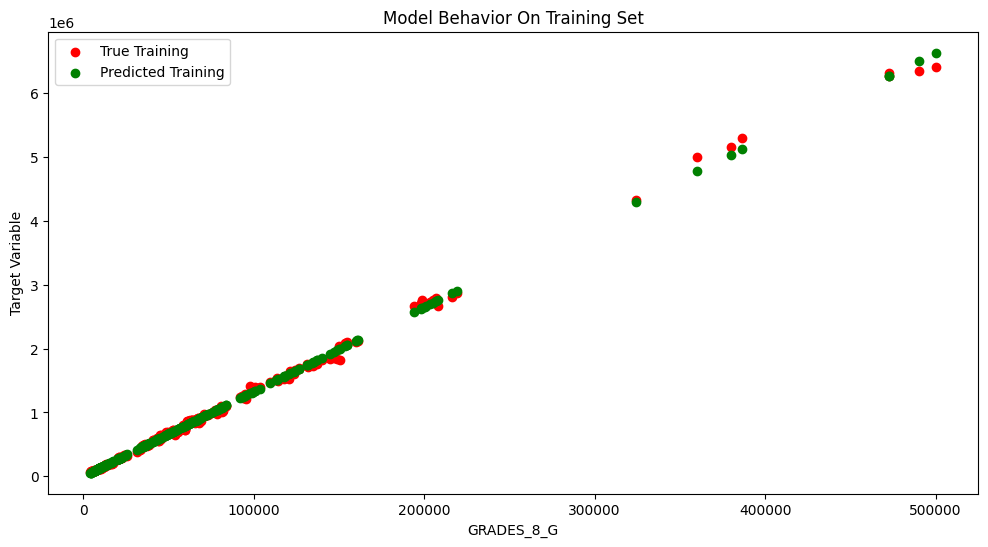

In [82]:
# @@@ 13

from sklearn.linear_model import LinearRegression

# Create and fit the model
model = LinearRegression()
model.fit(X_train[[cool_name]], y_train)  # Fit the model using X_train and y_train

# Plot the data
f = plt.figure(figsize=(12, 6))
plt.scatter(X_train[cool_name], y_train, color="red", label="True Training")
plt.scatter(X_train[cool_name], model.predict(X_train[[cool_name]]), color="green", label="Predicted Training")

plt.legend()
plt.xlabel(cool_name)
plt.ylabel("Target Variable")
plt.title("Model Behavior On Training Set")
plt.show()

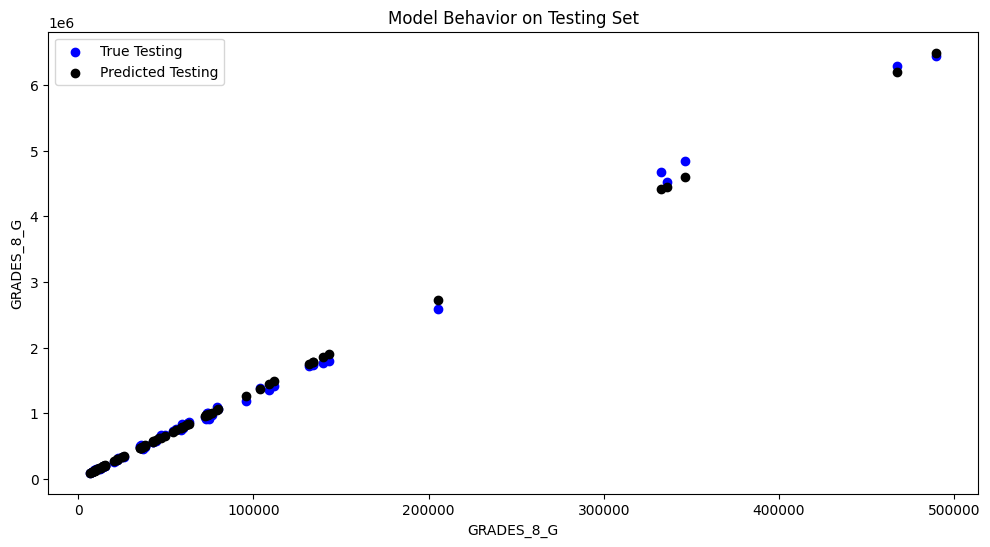

In [83]:
# @@@ 14


# Ensure the model is created and fitted first
from sklearn.linear_model import LinearRegression

# Fit the model on the training data (if not already done)
model = LinearRegression()
model.fit(X_train[[cool_name]], y_train)  # Fitting with training data

# Now proceed with the plotting for the test data
f = plt.figure(figsize=(12, 6))
plt.scatter(X_test[cool_name], y_test, color="blue", label="True Testing")
plt.scatter(X_test[cool_name], model.predict(X_test[[cool_name]]), color="black", label="Predicted Testing")

# Add labels, legend, and title
plt.legend()
plt.xlabel(cool_name)
plt.ylabel("GRADES_8_G")
plt.title("Model Behavior on Testing Set")
plt.show()
